<a href="https://colab.research.google.com/github/Bee-Ene/Breast-Cancer-Classification/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#viewing the dataset

bc_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Recommendation/data/breast-cancer.csv')

bc_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
#shape
bc_data.shape

(569, 32)

In [5]:
print(f'The missing values are: {bc_data.isnull().sum()}')

The missing values are: id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
#checking for duplicate values
print(f'The duplicated values are: {bc_data.duplicated().sum()}')

The duplicated values are: 0


In [7]:
#checking the datatypes
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#dropping id col
bc_data.drop(['id'], axis=1, inplace= True)

In [9]:
#checking how the values in diagnosis are labelled and the counts
bc_data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
#encoding catagorical values
bc_data.diagnosis = bc_data.diagnosis.map({'M':1, 'B':0})

In [11]:
#confirming if the encoding worked
bc_data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

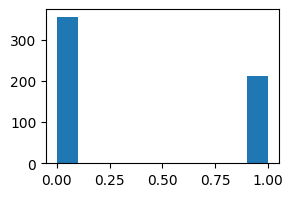

In [12]:

plt.figure(figsize=(3,2))
plt.hist(bc_data['diagnosis'])
plt.show()



In [13]:
correlation = bc_data.corr()['diagnosis']
correlation

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

**Data Splitting**

In [14]:
from sklearn.model_selection import train_test_split

X = bc_data.drop('diagnosis', axis=1)
y = bc_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [15]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [16]:
y_train.shape, y_test.shape

((455,), (114,))

**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#confirming the scaling
X_train_scaled, X_test_scaled

(array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
         -0.01614761, -0.38503402],
        [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
          0.09669004, -0.38615797],
        [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
         -0.20050207, -0.75144254],
        ...,
        [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
         -0.71542314, -0.11978123],
        [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
         -1.58157125, -1.00601779],
        [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
         -1.25895095,  0.21515662]]),
 array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
          1.08203284,  1.54029664],
        [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
         -0.73131577, -0.87732522],
        [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
         -1.22080864, -0.92115937],
        ...,
        [ 1.71811488,  0.09318356,  1.7286186 , ...,  

**Model Selection & Training**

In [19]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()

model_log.fit(X_train_scaled, y_train)
y_pred = model_log.predict(X_test_scaled)

**Evaluation**

In [20]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

print(f'The accuracy score for actual vs predicted values: {accuracy_score(y_test,y_pred)}')
print(f'The mean squared error of actual vs predicted values: {mean_squared_error(y_test,y_pred)}')
print(f'The r-2 score for actual vs predicted values: {r2_score(y_test,y_pred)}')

The accuracy score for actual vs predicted values: 0.9649122807017544
The mean squared error of actual vs predicted values: 0.03508771929824561
The r-2 score for actual vs predicted values: 0.8551921244839632


In [21]:
#Confusion metrics and classification report
from sklearn.metrics import confusion_matrix, classification_report

print(f'The confusion matrix is: {confusion_matrix(y_test,y_pred)}')
print(f'The classification report: {classification_report(y_test, y_pred)}')

The confusion matrix is: [[65  2]
 [ 2 45]]
The classification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



**XGBoost Classifier**

In [24]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
print(f'The accuracy score for actual vs predicted values: {accuracy_score(y_test,y_pred)}')
print(f'The mean squared error of actual vs predicted values: {mean_squared_error(y_test,y_pred)}')
print(f'The r-2 score for actual vs predicted values: {r2_score(y_test,y_pred)}')

The accuracy score for actual vs predicted values: 0.956140350877193
The mean squared error of actual vs predicted values: 0.043859649122807015
The r-2 score for actual vs predicted values: 0.8189901556049539


In [25]:
#Confusion metrics and classification report XGB
from sklearn.metrics import confusion_matrix, classification_report

print(f'The confusion matrix is: {confusion_matrix(y_test,y_pred)}')
print(f'The classification report: {classification_report(y_test, y_pred)}')

The confusion matrix is: [[64  3]
 [ 2 45]]
The classification report:               precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

